# Regression Model

simple regression model using random forest algorithm <br>
data = acetylcholinesterase inhibitor (acetylcholinesterase_dataset_pIC50_pubchem.csv) <br>
acetylcholinesterase is a target protein for alzheimer's disease

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [49]:
df = pd.read_csv('csv/serotonin_dataset_pIC50_pubchem.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.939302
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.376751
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.476254
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.559091
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.187087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.366532
2830,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.869666
2831,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.055024
2832,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057


# Background Explanation

### Lipinski vs Pubchem Fingerprint
<b>lipinski
1. provide simple molecular descriptors (give quick overview of the drug-like properties of the molecules — 5 rules) those that passed the 5 rules will make a good oral drug

2. global features: molecular weight, solubility, number of H bond donor and acceptor

<b>pubchem fingerprint
1. describe the local feature of the molecules: unique building block of the molecules, the way it bonds/connect to each other gives the unique molecular structures and properties
2. the goal is to have a structure that has the most potency with the least toxicity to interact with the target protein (i f toxic: will have side effects)
    
each molecules have a unique fingerprint which allows the machine learning algorithm to learn about the unique molecular properties of the compound;
goal is to identify active and inactive compounds (to determine whether the drug is good/have a potential of becoming a potent drug) <br>
*reminder note: pIC50 = inhibition concentration at 50%

In [50]:
x = df.drop('pIC50', axis = 1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2830,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2831,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2832,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#save x descriptor list for streamlit
x.to_csv('csv/descriptor_list.csv', index=False)

In [33]:
y = df['pIC50']
y

0       8.939302
1       8.376751
2       7.476254
3       7.559091
4       8.187087
          ...   
2829    7.366532
2830    6.869666
2831    6.055024
2832    7.886057
2833    8.023650
Name: pIC50, Length: 2834, dtype: float64

In [34]:
x.shape

(2834, 881)

In [35]:
y.shape

(2834,)

### Remove low variance features

In [36]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
x = selection.fit_transform(x)

In [37]:
x.shape

(2834, 145)

### Split data for training and test (80:20 ratio)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
x_train.shape, y_train.shape

((2267, 145), (2267,))

In [40]:
x_test.shape, y_test.shape

((567, 145), (567,))

### Build regression model using random forest

In [41]:
df.dtypes

PubchemFP0        int64
PubchemFP1        int64
PubchemFP2        int64
PubchemFP3        int64
PubchemFP4        int64
                 ...   
PubchemFP877      int64
PubchemFP878      int64
PubchemFP879      int64
PubchemFP880      int64
pIC50           float64
Length: 882, dtype: object

In [52]:
#to get consistant result
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
result = model.score(x_test, y_test)
result

0.26643641843848476

In [43]:
y_pred = model.predict(x_test)

### Scatter plot of experimental vs predicted pIC50 values

<function matplotlib.pyplot.show(close=None, block=None)>

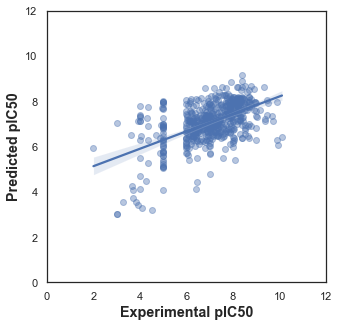

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show